<a href="https://colab.research.google.com/github/A-vidhyalakshmi/Yulu-case-study/blob/main/yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YULU BIZ CASE STUDY - HYPOTHESIS TESTING

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.




The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands


##**Concept Used:**

1. Bi-Variate Analysis
2. 2-sample t-test: testing for difference across populations
3. ANNOVA
4. Chi-square


we need functions and methods to do all these analysis, so we must import Python libraries into our work notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To perform Hypothesis testing we need to import few test functions

In [ ]:
from scipy.stats import ttest_ind,kstest
from scipy.stats import f_oneway,kruskal,chi2_contingency


To get the data into our work space we use the below code(to read csv files)
and saving the whole set of data into a single variable(dataframe) which makes analysis easier

In [ ]:
lis = [(0, 2), (1, 3), (2, 4)]
result = sum (n for _, n in lis)
print(result)


9


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu.csv

--2023-10-10 13:19:13--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.176, 108.157.172.183, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu.csv’

yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.1s    

2023-10-10 13:19:13 (6.08 MB/s) - ‘yulu.csv’ saved [648353/648353]



In [ ]:
df = pd.read_csv('yulu.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### TO ANALYSE THE BASIC METRICS


In [ ]:
# TO GET NO. OF ROWS & COLUMNS:

df.shape

(10886, 12)

In [ ]:
# TO GET TOTAL ELEMENTS IN THE DATASET (i.e., the dot product of no. of rows & columns)

df.size

130632

In [ ]:
# To get index

df.index

RangeIndex(start=0, stop=10886, step=1)

In [ ]:
# TO GET THE NAMES OF THE COLUMNS

df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# TO GET THE NAMES OF THE COLUMNS(alternate method)

df.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# To get memory usage of each column

df.memory_usage()

Index           128
datetime      87088
season        87088
holiday       87088
workingday    87088
weather       87088
temp          87088
atemp         87088
humidity      87088
windspeed     87088
casual        87088
registered    87088
count         87088
dtype: int64

In [ ]:
# TO GET THE TOTAL INFORMATION ABOUT THE DATASET.
# info function let us know the columns with their data types and no. of non-null values & the total memory usage


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


From the above analysis we get to know that except datetime which is an object  all others are either integer or float

### MISSING VALUE DETECTION


In [ ]:
df.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### INFERENCE:
**No missing** values found

In [ ]:
# To get the data type of each column

df.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

##### STATISTICAL SUMMERY


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Describe function returns the glimpse of the data with the statistical values from all over the data just to predict the normal ranges and average ranges to the particular elements.
Note: It will display only the numerical values and return from the numerical values.

**NOTE:**

Here, season, weather, holiday,  working day columns are categorical but considered as numerical.

In [ ]:
df.describe(include=object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### INFERENCE:

1. Registered users are more than the casual users
2. There are days when there is zero casual users or even zero registered users have been recorded
3. Maximum - Windspeed is 56.996900	, Humidity = 100, Temperature is 41 degree celcius
4. There are 4 different seasons and 4 different weather conditions.



### CONVERSION TO CATEGORICAL ATTRIBUTES:

Datatype of following attributes needs to changed to proper data type

1. datetime - to datetime
2. season - to categorical
3. holiday - to categorical
4. workingday - to categorical
5. weather - to categorical


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])


In [ ]:
cat_cols = ['season','holiday','workingday','weather']
for col in cat_cols:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


### NOTE:
The Dtype of datetime is now changed to datetime and season, weather, holiday, workingday are now changed to category

In [ ]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


### INFERENCE:

1. Among the 4 seasons, season 4 (winter) has more frequency than others but still their frequencies differs by very little margin
2. Among the 4 weeather, weather 1 has more frequency than others.

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### Splitting Datetime column into 2 seperate columns

In [ ]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [ ]:
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
7970,2012-06-12 11:00:00,2,0,1,3,27.06,30.305,83,23.9994,8,57,65,2012-06-12,11:00:00


In [ ]:
df.drop(['datetime'],axis = 1, inplace=True)

In [ ]:
df.keys()

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'time'],
      dtype='object')

In [ ]:
# Accessing the rows with their iloc(integer location) values

df.iloc[:4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00


In [ ]:
# Accessing selected range of rows using external location values

df.loc[3:6]


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01,05:00:00
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01,06:00:00


In [ ]:
# Accessing the specified columns for all rows using external location


df.loc[:,['workingday','count','date']]

,workingday,count,date
0,0,16,2011-01-01
1,0,40,2011-01-01
2,0,32,2011-01-01
3,0,13,2011-01-01
4,0,1,2011-01-01
...,...,...,...
10881,1,336,2012-12-19
10882,1,241,2012-12-19
10883,1,168,2012-12-19
10884,1,129,2012-12-19


## VISUAL ANALYSIS:


### UNIVARIATE


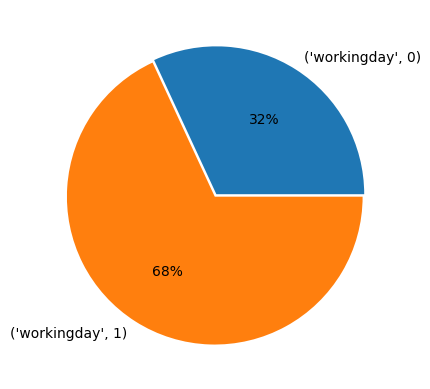

In [ ]:
workingday = ['workingday']

df1=df[workingday].melt().groupby(['variable','value'])[['value']].count()/len(df)

plt.pie(df1.value, labels=df1.index,explode=[0,0.02],autopct='%.0f%%')
plt.show()

In [ ]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

### INFERENCE:
The working day has more frequency than the holiday

### Understanding the distribution of numerical attributes

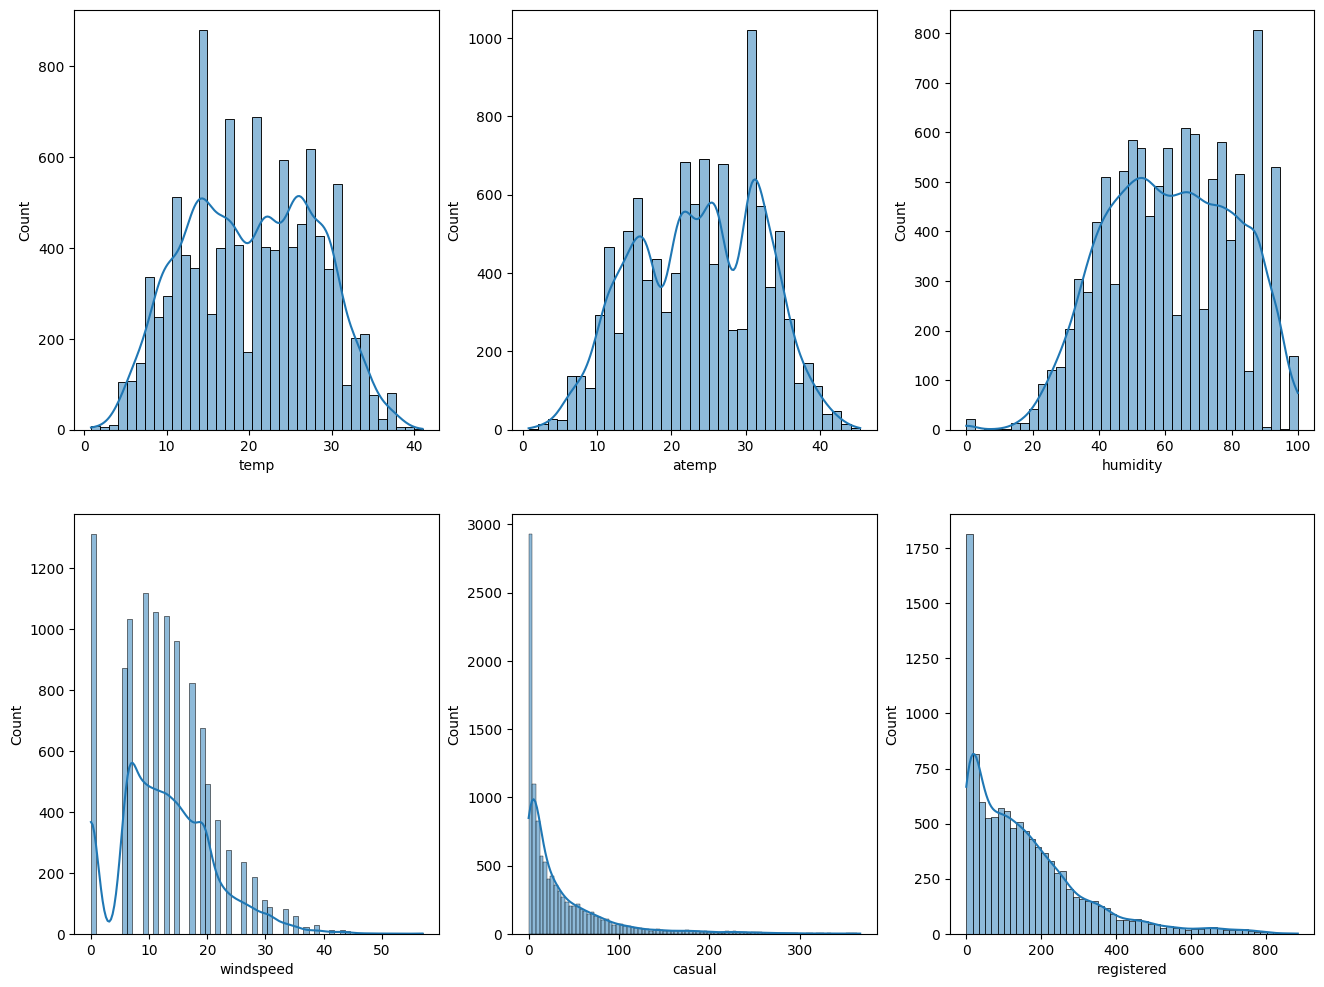

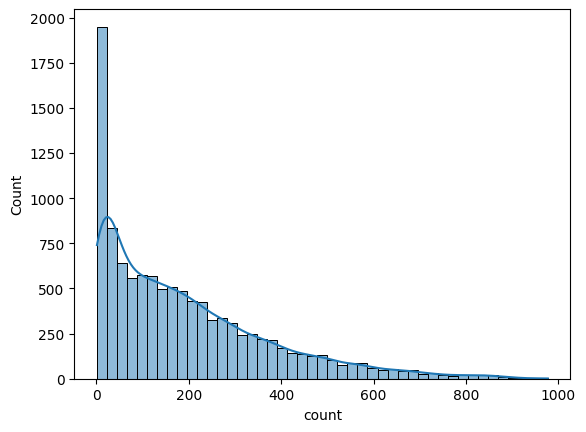

In [ ]:
# taking all the numerical columns names in an array

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

# subplotting the graphs

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# creating Histplot for every numerical attributes

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()


### INFERENCE:

1. **Casual, Registered** and hence the **Count** somewhat looks like **Log** **Normal** Distribution
2. **Temp, atemp** and **humidity** looks like they follows the **Normal** Distribution
3. **Windspeed** follows the **Binomial** distribution


### Analysing Categorical columns with countplot

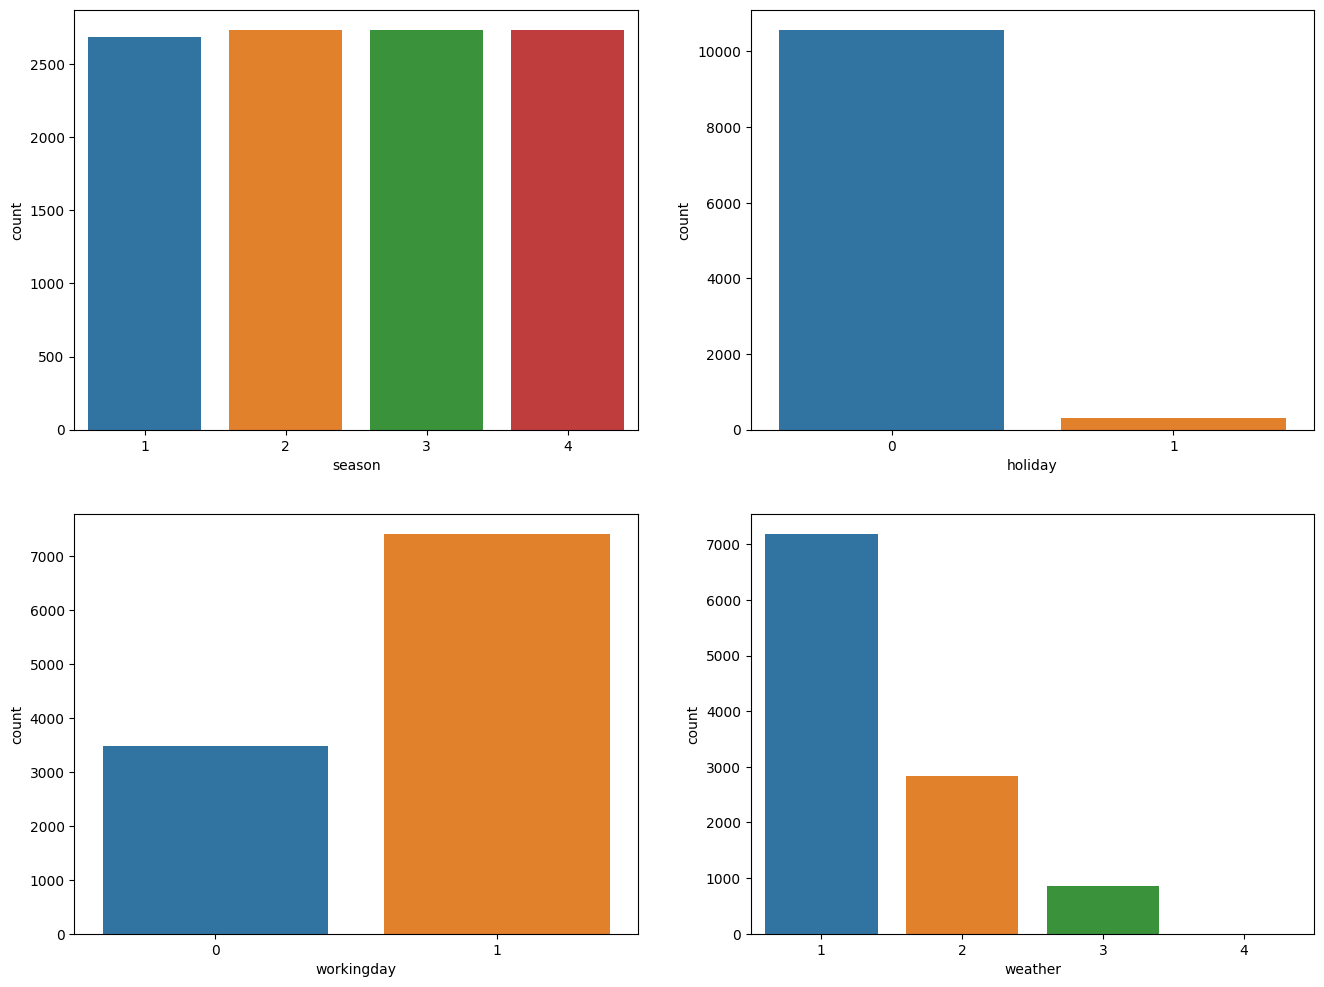

In [ ]:
cat_cols = ['season','holiday','workingday','weather']


fig, axis =  plt.subplots(nrows=2, ncols=2, figsize=(16,12))


index=0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df, x=cat_cols[index], ax=axis[row,col])
    index+=1
plt.show()


### INFERENCE:

1. Data looks common as it should be like equal number of days in each season
2. More working days
3. Most frequent Weather is Clear, Few clouds, partly cloudy and the least one is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, obviously as this weather prevails noone will rent a bike





### Predicting Outliers using BOXPLOT

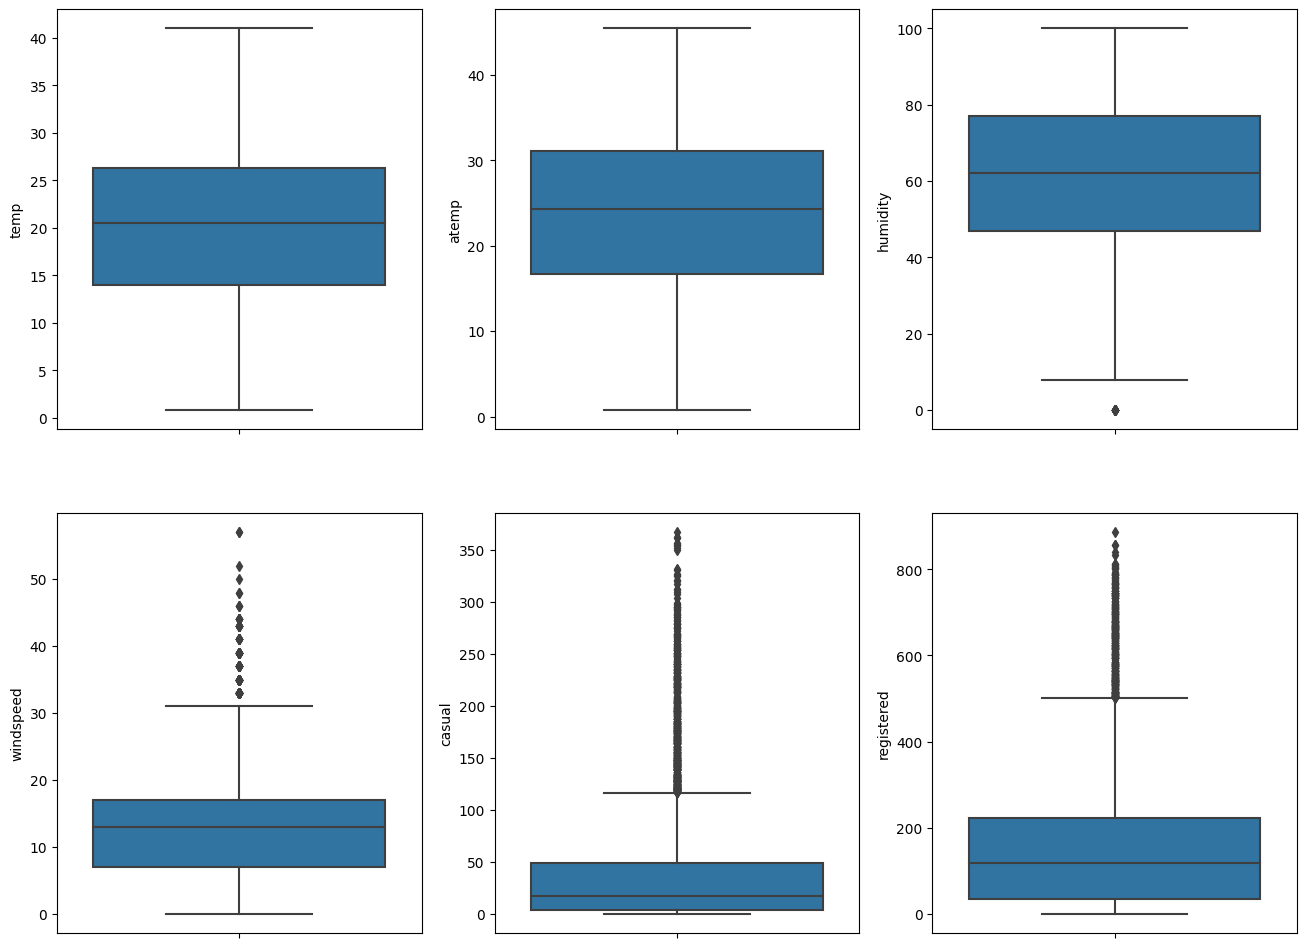

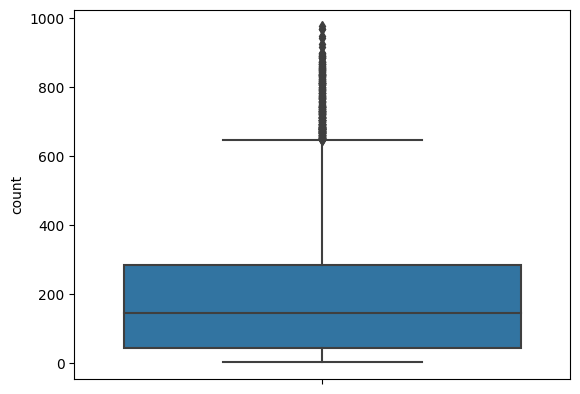

In [ ]:
# plotting box plots to detect outliers in the data

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(y=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(y=df[num_cols[-1]])
plt.show()


### INFERENCE:

We can clearly observe that casual, registered and count have more outliers in the data whereas humidity has one outlier in the data

### BIVARIATE ANALYSIS:

In [ ]:
df['count'].max(), df['count'].min()

(977, 1)

In [ ]:
bins = [0,200,400,600,800,1000]
labels = [1,2,3,4,5]

df['count_bins'] = pd.cut(df['count'],bins=bins, labels=labels)

df['count_bins'].value_counts()

1    6684
2    2759
3    1031
4     326
5      86
Name: count_bins, dtype: int64

### Countplot of Categorical columns vs count

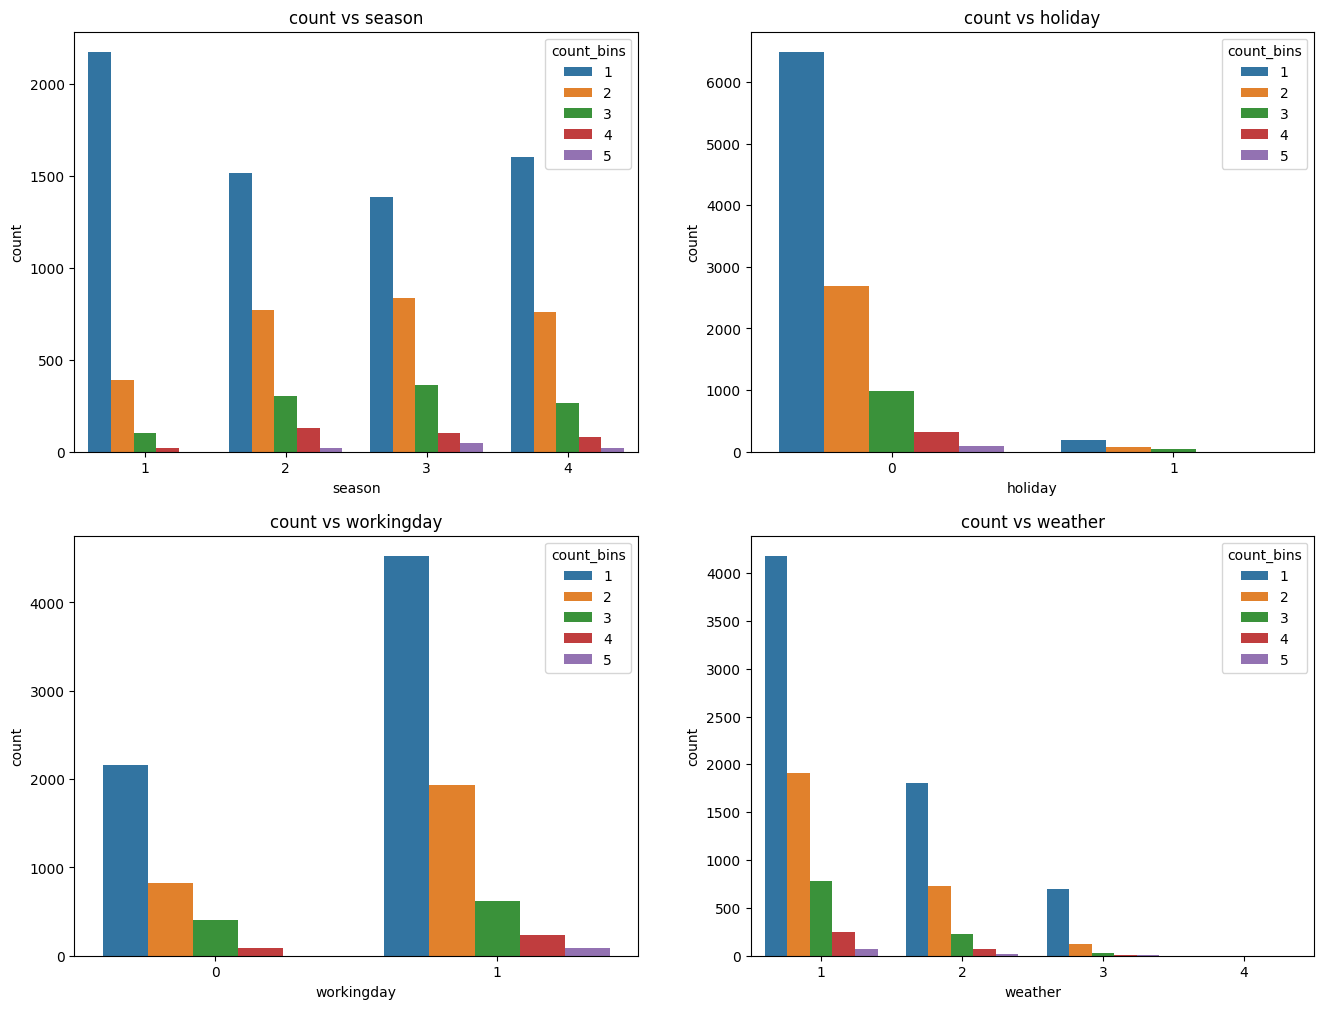

In [ ]:

fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(16,12))

index=0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df,x=cat_cols[index],hue='count_bins', ax=axis[row,col])
    axis[row,col].set_title(f'count vs {cat_cols[index]}')
    index+=1
plt.show()

### INFERENCE:

Visual analysis of all the categorical attributes with the count has been done.And from the result we observe,

1. Weather 4 has the least number of vehicles rented
2. Season 3 has more bikes rented


### PREDICTING OUTLIERS USING BOXPLOT

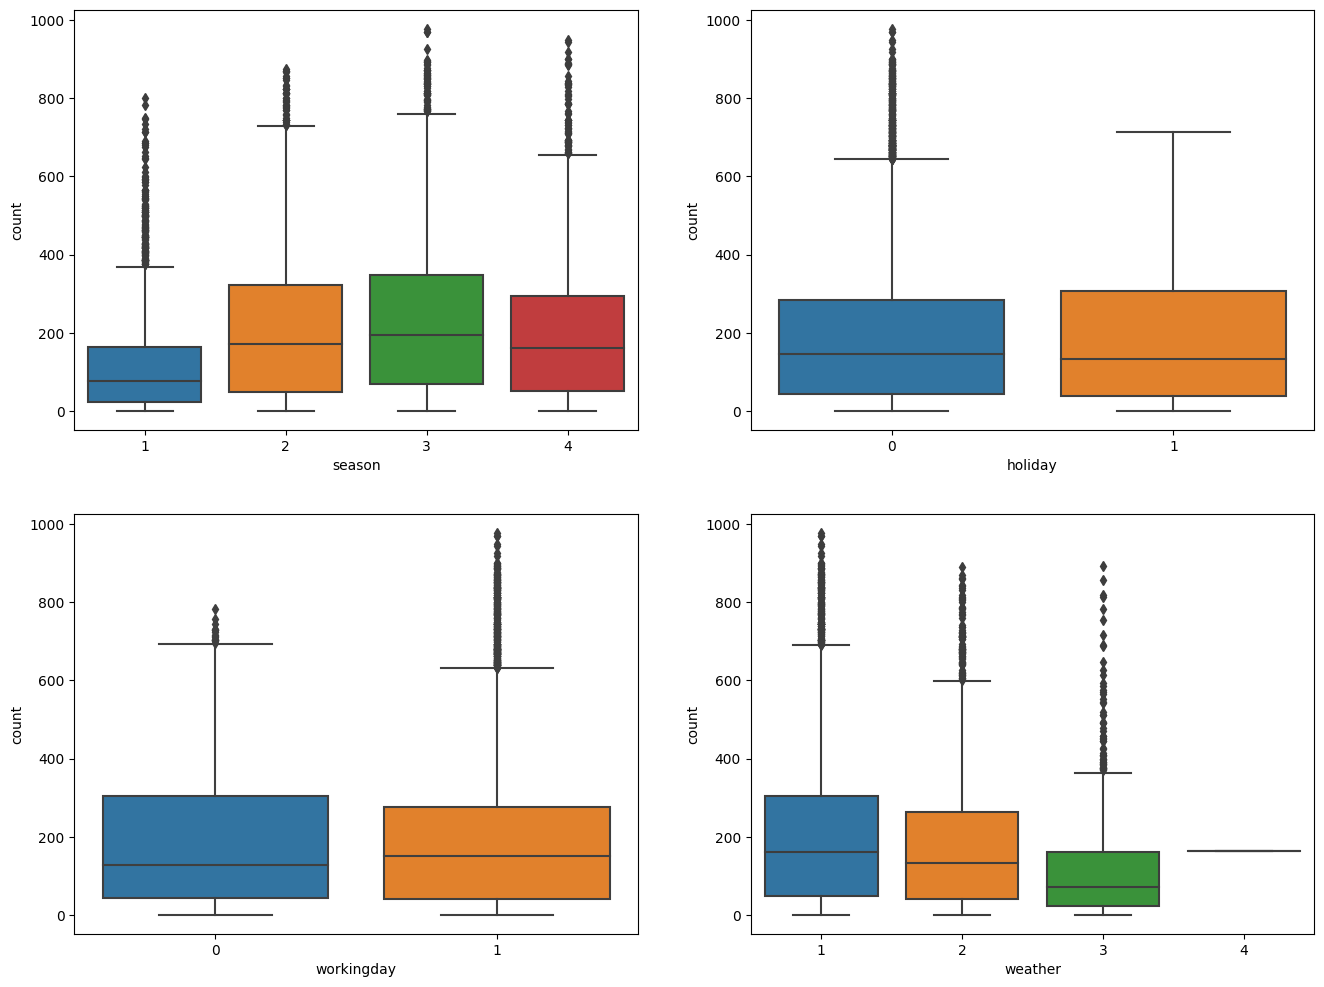

In [ ]:
# plotting categorical variables againt count using boxplots

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()


### INFERENCE:

1. In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
2. Whenever its a **holiday** more bikes are rented.
3. It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
4. Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented.


### SCATTERPLOTS

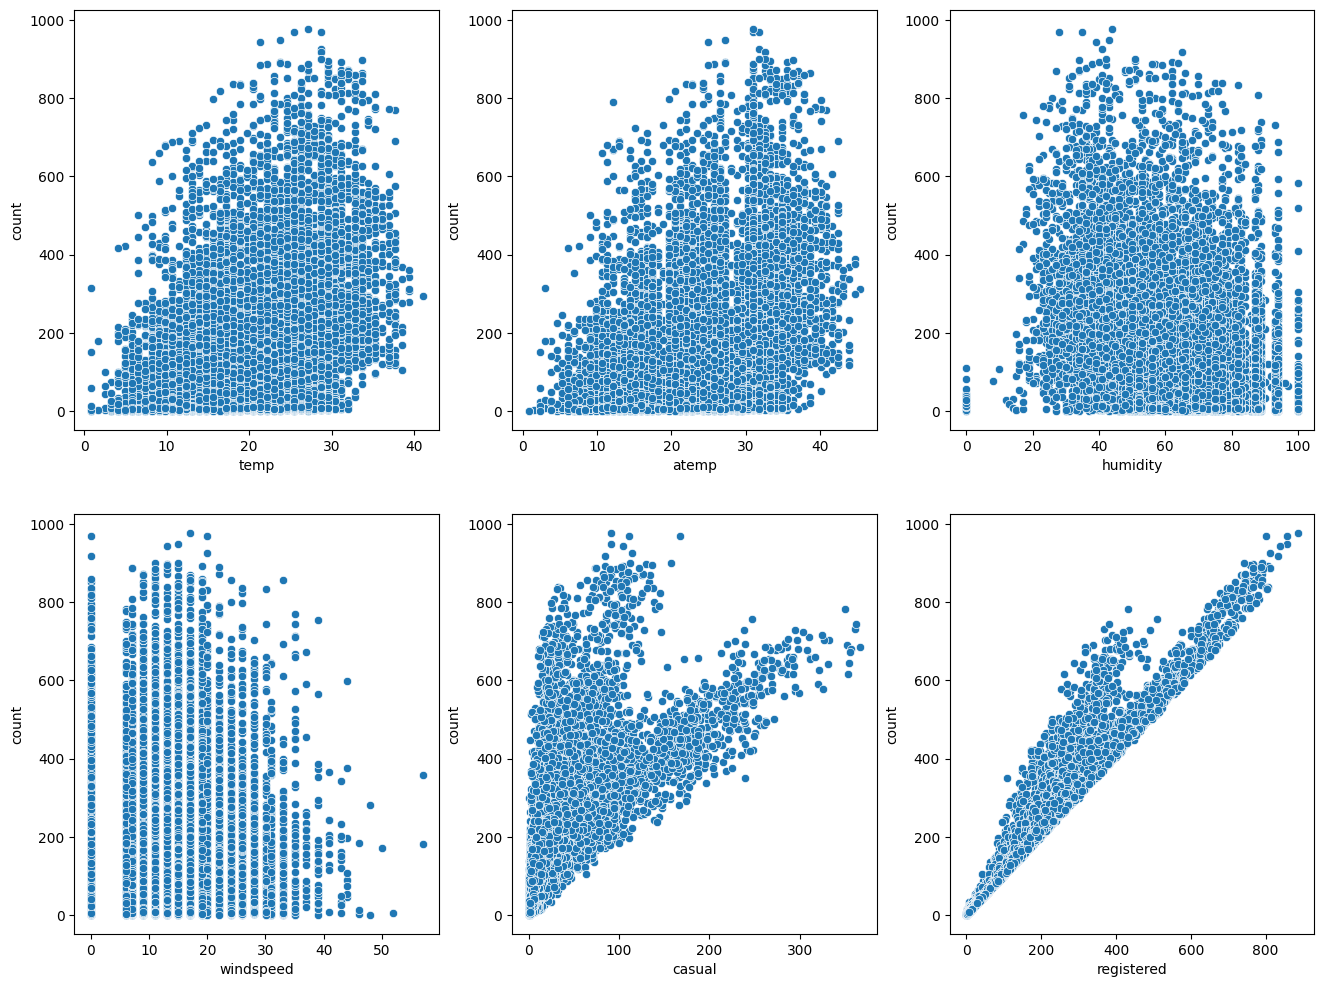

In [ ]:
# plotting numerical variables againt count using scatterplot


fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()


### INFERENCE:

1. Whenever the **humidity < 20**, number of bikes rented is very very low.
2. Whenever the **temperature < 10**, number of bikes rented is less.
3. Whenever the **windspeed > 35**, number of bikes rented is less.
4. The number and the usage of **Registered** user also increased linearly

### HEATMAPS

Correlation can be established only between two numerical columns

<ipython-input-64-7a3f2fbe6c0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


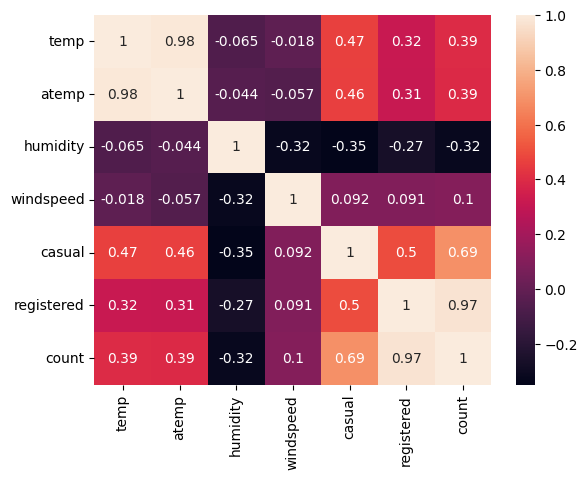

In [ ]:
sns.heatmap(df.corr(),annot = True)
plt.show()

### INFERENCE:

1. **Registered** users has **good** correaltion with count this implies that they contribute more towards count
2. **Humidity** has **negative** corrrelation with count
3. **Windspeed** and **Temperature** are **moderately** correlated with count

## HYPOTHESIS TESTING:

## ***1. Does working day has effect on number of electric cycles rented?***

Since the test involve a **categorical** column and its **numerical** values ttest can be performed. Also, the two groups are independent of each other so we use **ttest_ind.**

### 2-SAMPLE TTEST


**NULL HYPOTHESIS: (Ho)** - **Working day** has **no effect** on number of electric cycles rented

**ALTERNATE HYPOTHESIS: (Ha)** - **Working day** has **an effect** on number of electric cycles rented


In [ ]:
# For alpha =0.05 i.e., 95% confidence level

workingday_1 = df[df['workingday']==1][['count']]

workingday_0 = df[df['workingday']==0][['count']]

t_stat, p_value = ttest_ind(workingday_1['count'], workingday_0['count'])

print('p_value : ',p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Working day has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Working day has no effect on number of electric cycles rented')



p_value :  0.22644804226361348
FAIL TO REJECT Ho
INFERENCE - Working day has no effect on number of electric cycles rented


### INFERENCE:

Whether its a working day or not the number of bikes rented is **not affected**

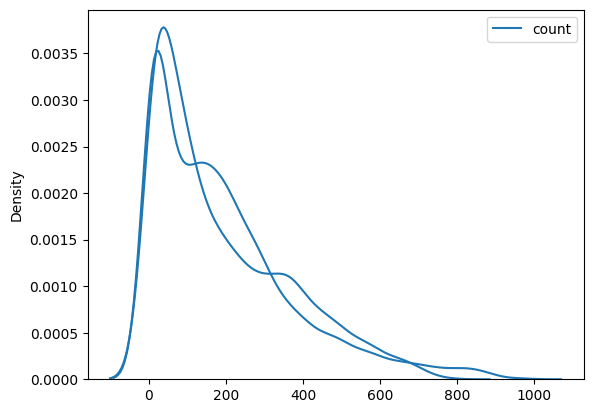

In [ ]:
sns.kdeplot(workingday_1)
sns.kdeplot(workingday_0)
plt.show()

INFERRENCE:

The **kdeplot** vividly shows that the graphs of both the groups are almost the  **same distribution** and they have **almost same mean.** so ttest is reliable in this case.


In [ ]:
workingday_0.mean(), workingday_1.mean()

(count    188.506621
 dtype: float64,
 count    193.011873
 dtype: float64)

## ***2. Does weather has effect on number of electric cycles rented?***

As the test has to be performed between **more than 2 categorical** groups we prefer **ANNOVA**

### ANNOVA


**NULL HYPOTHESIS: (Ho)** - **Weather** has **no effect** on number of electric cycles rented

**ALTERNATE HYPOTHESIS: (Ha)** - **Weather** has **an effect** on number of electric cycles rented


In [ ]:
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']


In [ ]:
# For alpha =0.05 i.e., 95% confidence level



f_stat, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)
print('p_value : ',p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Weather has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Weather has no effect on number of electric cycles rented')


p_value :  5.482069475935669e-42
REJECT Ho
INFERENCE - Weather has an effect on number of electric cycles rented


### INFERENCE:

**Weather** has **an effect** on the number of vehicles to be rented

### **ASSUMPTION OF ANNOVA:**

1. Distribution follows **Gaussian**
2. All samples are **independent**
3. **Equal variance** among different groups

<ipython-input-12-9199e072790a>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(weather_4)


<Axes: xlabel='count', ylabel='Density'>

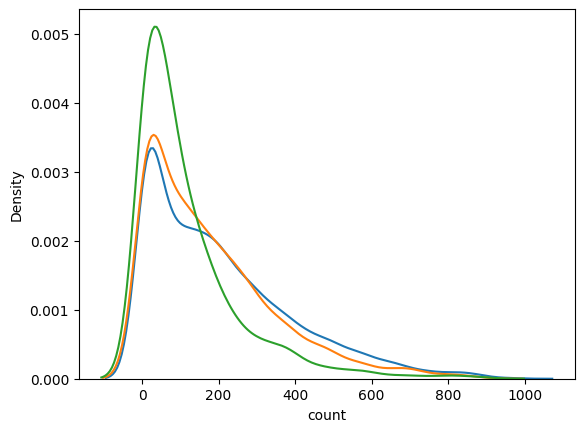

In [ ]:
sns.kdeplot(weather_1)
sns.kdeplot(weather_2)
sns.kdeplot(weather_3)
sns.kdeplot(weather_4)



In [ ]:
weather_1.var(), weather_2.var() ,weather_3.var(), weather_4.var()

(35328.79846268022, 28347.248993301797, 19204.77589271419, nan)

### INFERENCE:
Since there is **no equal variance** among the groups we cant just rely on Annova. so to **check the reliability** of Annova we perform **Kruskal** test

### KRUSKAL TEST


In [ ]:
# For alpha =0.05 i.e., 95% confidence level


kruskal_stat, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)
print('p_value : ',p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Weather has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Weather has no effect on number of electric cycles rented')


p_value :  3.501611300708679e-44
REJECT Ho
INFERENCE - Weather has an effect on number of electric cycles rented


### INFERENCE:
Kruskal test also confirms that **Weather** has **an effect** on the number of vehicles  rented

<Axes: xlabel='weather', ylabel='count'>

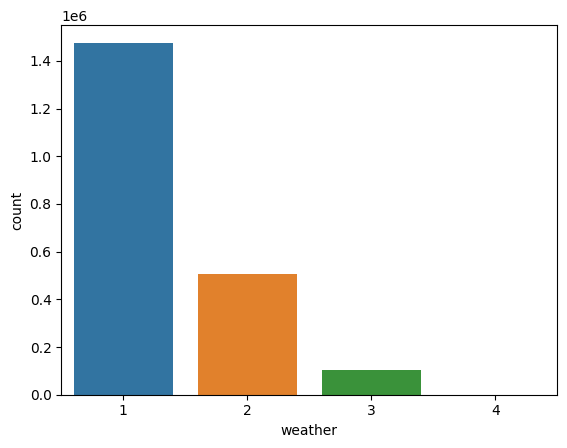

In [ ]:
weather_grouped = pd.DataFrame(df.groupby('weather')['count'].sum())

sns.barplot(data = weather_grouped, x=weather_grouped.index, y='count')


Visual confirmation of the fact that weather has effect on the number of vehicles to be rented

## ***3. Does season has effect on number of electric cycles rented?***

As the test has to be performed between **more than 2 categorical** groups we prefer **ANNOVA**

### ANNOVA


**NULL HYPOTHESIS: (Ho)** - **Season** has **no effect** on number of electric cycles rented

**ALTERNATE HYPOTHESIS: (Ha)** - **Season** has **an effect** on number of electric cycles rented


In [ ]:
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']


In [ ]:
# For alpha =0.05 i.e., 95% confidence level



f_stat, p_value = f_oneway(season_1, season_2, season_3, season_4)
print('p_value : ',p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Season has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Season has no effect on number of electric cycles rented')


p_value :  6.164843386499654e-149
REJECT Ho
INFERENCE - Season has an effect on number of electric cycles rented


### INFERENCE:

**Season** has **an effect** on the number of vehicles to be rented

### **ASSUMPTION OF ANNOVA:**

1. Distribution follows **Gaussian**
2. All samples are **independent**
3. **Equal variance** among different groups

<Axes: xlabel='count', ylabel='Density'>

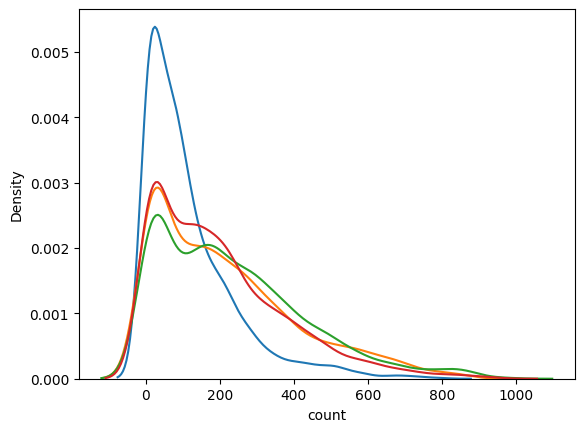

In [ ]:
sns.kdeplot(season_1)
sns.kdeplot(season_2)
sns.kdeplot(season_3)
sns.kdeplot(season_4)


In [ ]:
season_1.var(), season_2.var() ,season_3.var(), season_4.var()


(15693.568533717144, 36867.01182553242, 38868.517012662865, 31549.720316669307)

### INFERENCE:
Since there is **no equal variance** among the groups we cant just rely on Annova. so to **check the reliability** of Annova we perform **Kruskal** test

### KRUSKAL TEST

In [ ]:
# For alpha =0.05 i.e., 95% confidence level



kruskal_stat, p_value = kruskal(season_1, season_2, season_3, season_4)
print('p_value : ',p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Season has an effect on number of electric cycles rented')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Season has no effect on number of electric cycles rented')


p_value :  2.479008372608633e-151
REJECT Ho
INFERENCE - Season has an effect on number of electric cycles rented


### INFERENCE:
Kruskal test also confirms that **Season** has **an effect** on the number of vehicles  rented

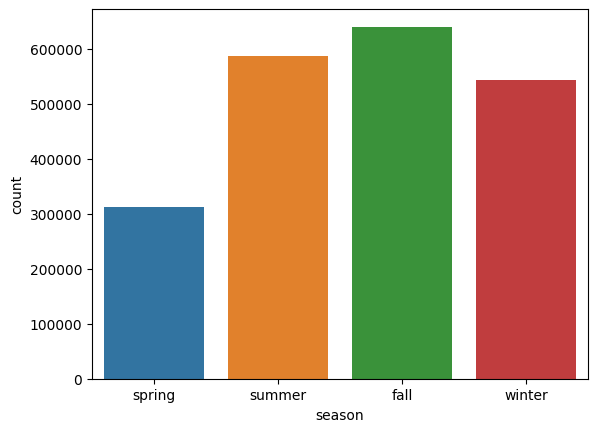

In [ ]:
season_grouped = pd.DataFrame(df.groupby('season')['count'].sum())
sns.barplot(data=season_grouped,x=season_grouped.index,y='count')
plt.xticks(range(4),['spring','summer','fall','winter'])
plt.show()

Visual confirmation of the fact that Season has effect on the number of vehicles to be rented

## ***4. Is Weather dependent on Season ?***

Comparing **two categorical** columns involving their **frequency**, so we need to perform **chi-square test**

### CHI-SQUARE TEST


**NULL HYPOTHESIS: (Ho)** - **Weather** is **independent**  of **Season**

**ALTERNATE HYPOTHESIS: (Ha)** - **Weather** is **dependent** on **Season**


In [ ]:
pd.crosstab(df['weather'],df['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
# For alpha =0.05 i.e., 95% confidence level


chi_stat,p_value,dof,exp = chi2_contingency(pd.crosstab(df['weather'],df['season']))

print('p_value : ',p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Weather and Season are Dependent')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Weather and Season are Independent')


p_value :  1.5499250736864862e-07
REJECT Ho
INFERENCE - Weather and Season are Dependent


### INFERENCE:

**Weather** and **Season** are two columns which **Depend** on each other

## EXTRA BITS:


1. Whether the number of casual users depend on temperature ?

In [ ]:
chi_stat,p_value,dof,exp = chi2_contingency(pd.crosstab(df['temp'],df['casual']))

print('p_value : ', p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Temperature and number of Casual users are Dependent')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Temperature and number of Casual users are Independent')


p_value :  1.7731490661070978e-237
REJECT Ho
INFERENCE - Temperature and number of Casual users are Dependent


2. Whether the number of registered users depend on temperature ?


In [ ]:
chi_stat,p_value,dof,exp = chi2_contingency(pd.crosstab(df['temp'],df['registered']))

print('p_value : ', p_value)

alpha = 0.05

if p_value < alpha:
  print('REJECT Ho')
  print('INFERENCE - Temperature and number of Registered users are Dependent')

else:
  print('FAIL TO REJECT Ho')
  print('INFERENCE - Temperature and number of Registered users are Independent')


p_value :  0.99943702404443
FAIL TO REJECT Ho
INFERENCE - Temperature and number of Registered users are Independent


### INFERENCE:

It is Statistically proved that,
1. Number of **Casual** users are **dependent** on **Temperature**
2. Number of **Registered** users are **independent** of **Temperature**

##**Insights:**
1. In **summer** and **fall** seasons **more bikes** are rented as compared to other seasons.
2. Whenever its a **holiday more bikes**  are rented.
3. It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
4. Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
5. Whenever the **humidity < 20**, number of bikes rented is very very low.
6. Whenever the **temperature < 10**, number of bikes rented is less.
7. Whenever the **windspeed > 35**, number of bikes rented is less.


## **Recommendations:**
1. In **summer** and **fall** seasons the company should have **more bikes** in **stock** to be rented. Because the demand in these seasons is higher as compared to other seasons.
2. With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
3. In very **low humid** days, company should have **less bikes** in the stock to be rented. so, maintainance of the bikes like repair works can be done.
4. Whenever temprature is less than 10 or in very cold days, company should have less bikes.
5. Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.